In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, cv2, itertools # cv2 -- OpenCV
import matplotlib.pyplot as plt 
import zipfile as ZipFile
import random
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
from zipfile import ZipFile
zf = ZipFile(r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats\train.zip', 'r')
zf.extractall(r'C:\Users\נעמיה\data-science\sb')
zf.close()

In [4]:
filenames = os.listdir(r'C:\Users\נעמיה\data-science\sb\train')
categories = []
image=[]
s=100
for filename in filenames:
    
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
for img in filenames:
    path=r'./train/'+ img
    img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    try:
        new_img_array = cv2.resize(img_array, dsize=(s, s))
        new_img_array=new_img_array.reshape(s*s)
        image.append(new_img_array)
    except:
        break

df = pd.DataFrame({
    'filename': filenames,
    'image':image,
    'category': categories
})


#     new_img=resize_image(path)
#     img_res.append(new_img)

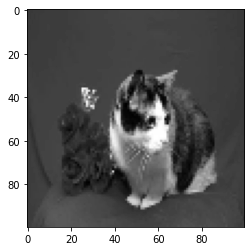

In [5]:
plt.imshow(random.choice(image).reshape(s,s),cmap='gray')

In [6]:
df.head(10)

,filename,image,category
0,cat.0.jpg,"[168, 174, 177, 181, 185, 188, 190, 193, 196, ...",0
1,cat.1.jpg,"[43, 44, 43, 42, 52, 34, 51, 40, 39, 63, 38, 3...",0
2,cat.10.jpg,"[39, 25, 43, 49, 47, 57, 58, 54, 53, 59, 47, 5...",0
3,cat.100.jpg,"[221, 224, 222, 228, 229, 224, 224, 235, 229, ...",0
4,cat.1000.jpg,"[115, 119, 122, 91, 83, 95, 132, 131, 149, 180...",0
5,cat.10000.jpg,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",0
6,cat.10001.jpg,"[119, 117, 112, 117, 115, 119, 109, 103, 98, 9...",0
7,cat.10002.jpg,"[57, 64, 64, 60, 62, 63, 60, 63, 61, 63, 61, 6...",0
8,cat.10003.jpg,"[239, 241, 243, 239, 242, 243, 250, 251, 253, ...",0
9,cat.10004.jpg,"[78, 79, 74, 82, 71, 70, 75, 70, 66, 69, 67, 6...",0


In [7]:
image=np.array(image)
image_re = image.reshape(len(image),-1)
# df['image'].reshape(25000,10000)
image_re

array([[168, 174, 177, ...,   2,   2,   2],
       [ 43,  44,  43, ...,  89,  19,  36],
       [ 39,  25,  43, ..., 169, 171, 153],
       ...,
       [ 42,  35,  47, ..., 127, 113, 167],
       [254, 251, 245, ..., 116, 114, 121],
       [240, 241, 243, ..., 254, 254, 254]], dtype=uint8)

In [8]:
image[15].reshape(10000)

array([ 45,  46,  46, ..., 106, 108, 112], dtype=uint8)

In [9]:
df.tail(10)

,filename,image,category
24990,dog.9990.jpg,"[216, 193, 184, 139, 177, 189, 158, 168, 163, ...",1
24991,dog.9991.jpg,"[33, 40, 48, 24, 26, 26, 28, 32, 28, 48, 100, ...",1
24992,dog.9992.jpg,"[33, 39, 50, 34, 45, 42, 41, 64, 55, 55, 57, 6...",1
24993,dog.9993.jpg,"[203, 203, 203, 203, 203, 202, 202, 202, 201, ...",1
24994,dog.9994.jpg,"[122, 128, 124, 125, 127, 129, 130, 128, 125, ...",1
24995,dog.9995.jpg,"[140, 143, 142, 145, 146, 147, 148, 149, 148, ...",1
24996,dog.9996.jpg,"[117, 78, 102, 83, 101, 113, 69, 85, 86, 86, 7...",1
24997,dog.9997.jpg,"[42, 35, 47, 58, 65, 46, 51, 57, 58, 40, 44, 4...",1
24998,dog.9998.jpg,"[254, 251, 245, 234, 224, 207, 189, 144, 112, ...",1
24999,dog.9999.jpg,"[240, 241, 243, 243, 242, 243, 247, 252, 247, ...",1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

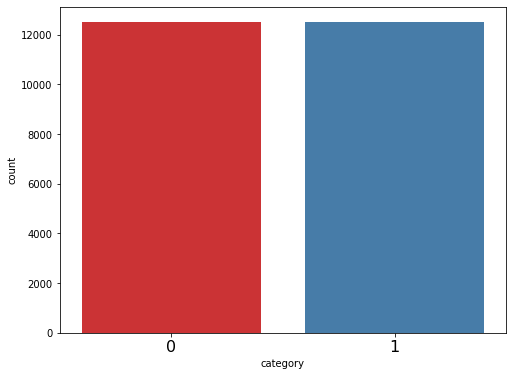

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="category",palette="Set1")
plt.xticks(fontsize=16)

In [11]:
from sklearn.model_selection import train_test_split
X=image_re
y=df['category']


x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

x_train

array([[118, 127, 130, ...,  68,  61,  75],
       [ 48,  33,  32, ...,  19,  19,  18],
       [132, 135, 137, ..., 127, 126, 132],
       ...,
       [194, 194, 196, ..., 152, 147, 145],
       [ 17,  39,  39, ...,  14,  25,  44],
       [230, 217, 220, ..., 123, 125, 129]], dtype=uint8)

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)


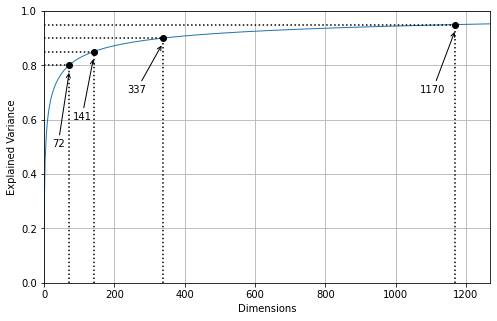

In [13]:
d = np.argmax(cumsum >= 0.95) + 1
d2 = np.argmax(cumsum >= 0.9) + 1
d3 = np.argmax(cumsum >= 0.85) + 1
d4 = np.argmax(cumsum >= 0.8) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, d+100, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(d, 0.93), xytext=(d-100, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.plot([d2, d2], [0, 0.9], "k:")
plt.plot([0, d2], [0.9, 0.9], "k:")
plt.plot(d2, 0.9, "ko")
plt.annotate(d2, xy=(d2, 0.88), xytext=(d2-100, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.plot([d3, d3], [0, 0.85], "k:")
plt.plot([0, d3], [0.85, 0.85], "k:")
plt.plot(d3, 0.85, "ko")
plt.annotate(d3, xy=(d3, 0.83), xytext=(d3-60, 0.6),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.plot([d4, d4], [0, 0.8], "k:")
plt.plot([0, d4], [0.8, 0.8], "k:")
plt.plot(d4, 0.8, "ko")
plt.annotate(d4, xy=(d4, 0.78), xytext=(d4-50, 0.5),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.grid(True)

plt.show()

In [14]:
pca = PCA(n_components=0.9)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [15]:
print('dimensions x_train_pca:',x_train_pca.shape)
print('dimensions x_test_pca:',x_test_pca.shape)

dimensions x_train_pca: (22500, 337)
dimensions x_test_pca: (2500, 337)


In [17]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipe_rf.fit(x_train_pca, y_train)
pred=[]
rfpred = pipe_rf.predict(x_test_pca)
pred.append(rfpred)

In [16]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000))
])
pipe_lr.fit(x_train_pca, y_train)
lrpred = pipe_lr.predict(x_test_pca)
pred.append(lrpred)

In [51]:
pipe_et = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et.fit(x_train_pca, y_train)
etpred = pipe_et.predict(x_test_pca)
pred.append(etpred)

In [18]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
pipe_knn.fit(x_train_pca, y_train)
knnpred = pipe_knn.predict(x_test_pca)
pred.append(knnpred)

In [19]:
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False))
])
pipe_xgb.fit(x_train_pca, y_train)
xgbpred = pipe_xgb.predict(x_test_pca)
pred.append(xgbpred)

[15:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


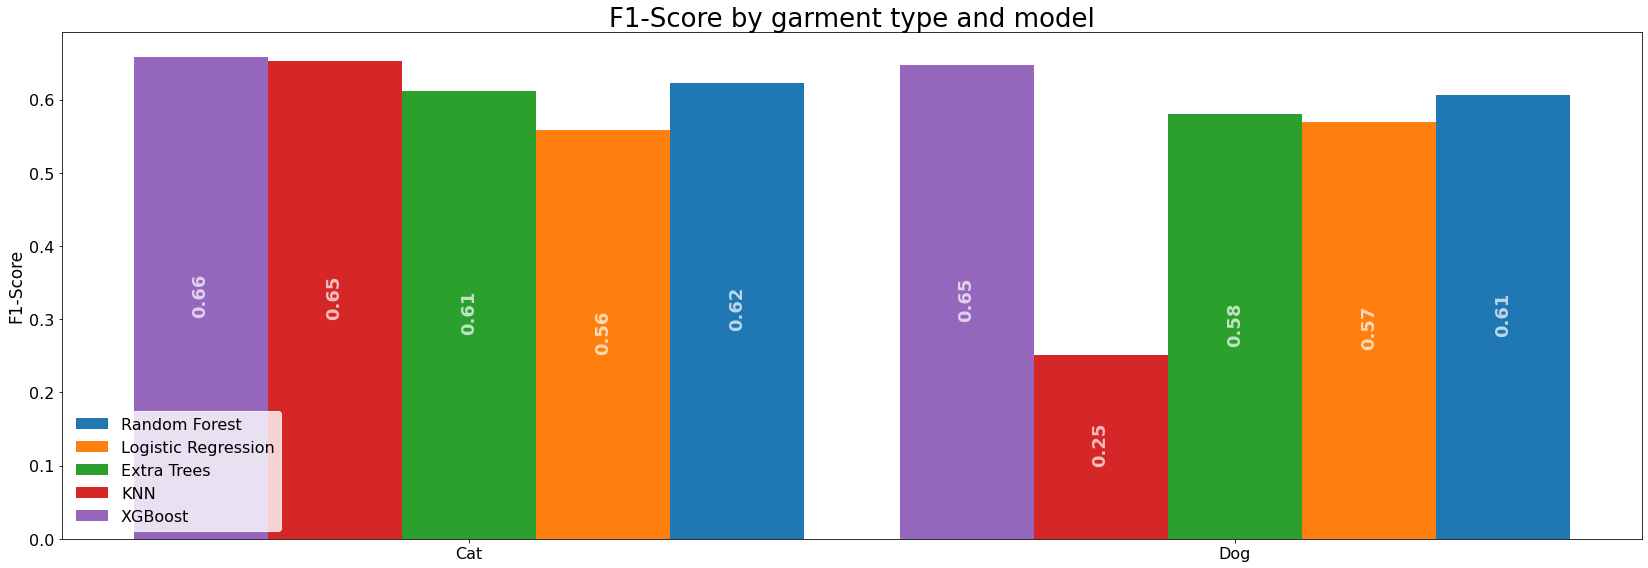

In [25]:
rows, cols = (5, 2)
arr = [[0 for i in range(cols)] for j in range(rows)]
j=0
for i in pred:
    fscore = f1_score(y_test, i ,average=None)
    arr[j]=fscore
    j+=1

    dictionary = {
    0 :'Cat',
    1 : 'Dog'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())
fig, ax = plt.subplots(figsize = (23,8))
width = 0.35;width2=width/2
rect=[];i=0
x=np.arange(len(class_names))
for i in range(5):
    rect.append(ax.bar(x+width,arr[i],width2, label='class_names'))
    width-=width2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score',fontsize=17)
ax.set_title('F1-Score by garment type and model',fontsize=26)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(class_names)
legend=ax.legend(labels=['Random Forest','Logistic Regression','Extra Trees','KNN','XGBoost'],frameon = 2,loc='lower left',
         fontsize =16)
frame = legend.get_frame()
frame.set_color('white')
def axeplot(rect):
    ax.bar_label(rect, padding=3,fmt='%1.2f',label_type ='center',color='white',
                 fontweight='bold',fontsize=18,rotation=90,alpha=0.7)
for i in range(5):
    axeplot(rect[i])


fig.tight_layout()

In [20]:
pca2 = PCA(n_components=0.85)
x_train_pca2=pca2.fit_transform(x_train)
x_test_pca2=pca2.transform(x_test)

In [21]:
print('dimensions x_train_pca:',x_train_pca2.shape)
print('dimensions x_test_pca:',x_test_pca2.shape)

dimensions x_train_pca: (22500, 141)
dimensions x_test_pca: (2500, 141)


In [22]:
from sklearn.model_selection import cross_val_score
xgbclf=XGBClassifier(n_estimators=500,use_label_encoder=False)
scores = cross_val_score(pipe_xgb, x_train_pca, y_train, cv=5)


[15:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:54:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [23]:
print("%0.4f CV accuracy on XGBoost with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(pipe_xgb.score(x_test_pca,y_test)," accuracy on XGBoost")

0.6442 CV accuracy on XGBoost with a standard deviation of 0.01
0.6496  accuracy on XGBoost


In [41]:
pipe_xgb2 = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',XGBClassifier(use_label_encoder=False))
])
pipe_xgb2.fit(x_train_pca2, y_train)
xgbpred2 = pipe_xgb2.predict(x_test_pca2)


[23:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
scores2 = cross_val_score(pipe_xgb, x_train_pca2, y_train, cv=5)


[17:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [26]:
print("%0.4f CV accuracy on XGBoost with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))
print(pipe_xgb.score(x_test_pca2,y_test)," accuracy on XGBoost")

0.6482 CV accuracy on XGBoost with a standard deviation of 0.01
0.6508  accuracy on XGBoost


In [32]:
pipe_rf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipe_rf2.fit(x_train_pca2, y_train)
rfpred = pipe_rf2.predict(x_test_pca2)

In [29]:
scoresrf = cross_val_score(pipe_rf, x_train_pca, y_train, cv=5)

In [33]:
scoresrf2 = cross_val_score(pipe_rf2, x_train_pca2, y_train, cv=5)

In [41]:
# knnscores = cross_val_score(pipe_rf, x_train_pca, y_train, cv=5)

In [31]:
print("%0.4f CV accuracy on RF with a standard deviation of %0.2f" % (scoresrf.mean(), scoresrf.std()))
print(pipe_rf.score(x_test_pca,y_test)," accuracy on RF")

0.5984 CV accuracy on RF with a standard deviation of 0.00
0.6048  accuracy on RF


In [34]:
print("%0.4f CV accuracy on RF with a standard deviation of %0.2f" % (scoresrf2.mean(), scoresrf2.std()))
print(pipe_rf2.score(x_test_pca2,y_test)," accuracy on RF")

0.6084 CV accuracy on RF with a standard deviation of 0.01
0.6156  accuracy on RF


In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipe_rf2, param_distributions = random_grid, cv = 5, n_jobs = -1)
rf_random.fit(x_train_pca2, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, None],
                                        'rf__max_features': ['auto', 'sqrt'],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [200, 400, 600, 800,
                                                             1000, 1200, 1400,
                                                             1600, 1800,
                           

In [40]:
rf_random.best_params_


{'rf__n_estimators': 1600,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 2,
 'rf__max_features': 'auto',
 'rf__max_depth': 50,
 'rf__bootstrap': True}

In [42]:
rf_random.best_score_

0.6500444444444444

In [52]:
pipe_et2 = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et2.fit(x_train_pca2, y_train)
etpred2 = pipe_et2.predict(x_test_pca2)

In [53]:
scoreset = cross_val_score(pipe_et, x_train_pca, y_train, cv=5)
scoreset2 = cross_val_score(pipe_et2, x_train_pca2, y_train, cv=5)

In [54]:
print("%0.4f CV accuracy on ET with PCA of 0.9 Vs CV accuracy on ET with PCA of 0.85 %0.4f" % (scoreset.mean(), scoreset2.mean()))

0.5900 CV accuracy on ET with PCA of 0.9 Vs CV accuracy on ET with PCA of 0.85 0.5980


In [56]:
random_grid = {'et__n_estimators': n_estimators,
               'et__max_features': max_features,
               'et__max_depth': max_depth,
               'et__min_samples_split': min_samples_split,
               'et__min_samples_leaf': min_samples_leaf,
               'et__bootstrap': bootstrap}
et_random = RandomizedSearchCV(estimator = pipe_et2, param_distributions = random_grid, cv = 5, n_jobs = -1)
et_random.fit(x_train_pca2, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('et', ExtraTreesClassifier())]),
                   n_jobs=-1,
                   param_distributions={'et__bootstrap': [True, False],
                                        'et__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, None],
                                        'et__max_features': ['auto', 'sqrt'],
                                        'et__min_samples_leaf': [1, 2, 4],
                                        'et__min_samples_split': [2, 5, 10],
                                        'et__n_estimators': [200, 400, 600, 800,
                                                             1000, 1200, 1400,
                                                             1600, 1800,
                             

In [65]:
et_random.best_params_

{'et__n_estimators': 1200,
 'et__min_samples_split': 5,
 'et__min_samples_leaf': 1,
 'et__max_features': 'sqrt',
 'et__max_depth': 110,
 'et__bootstrap': False}

In [64]:
et_random.best_score_

0.6556444444444445

In [44]:
maxd = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
n_est= [200, 400, 600, 800, 1000, 1200, 1400,1600, 1800,2000]
lr= [0.1, 0.01,0.2,0.3, 0.05]
subsample= [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bylevel=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_child_weight=[0.5, 1.0, 3.0, 5.0, 7.0, 10.0]
gamma=[0, 0.25, 0.5, 1.0]
reg_lambda= [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = dict(xgb__n_estimators=n_est,xgb__learning_rate=lr,xgb__colsample_bytree=colsample_bytree,
                  xgb__subsample=subsample,
                  xgb__colsample_bylevel=colsample_bylevel,
                  xgb__min_child_weight=min_child_weight,
                  xgb__reg_lambda=reg_lambda,
                  xgb__gamma=gamma,
                  xgb__max_depth=maxd)

In [45]:
xg_grid = RandomizedSearchCV(estimator = pipe_xgb2, param_distributions = parameters, cv = 5, n_jobs = -1)
xg_grid.fit(x_train_pca2, y_train)

[04:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type='gain',
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                            max_delta_step=0,
                                   

In [47]:
xg_grid.best_params_

{'xgb__subsample': 0.5,
 'xgb__reg_lambda': 50.0,
 'xgb__n_estimators': 2000,
 'xgb__min_child_weight': 7.0,
 'xgb__max_depth': 80,
 'xgb__learning_rate': 0.01,
 'xgb__gamma': 1.0,
 'xgb__colsample_bytree': 0.6,
 'xgb__colsample_bylevel': 1.0}

In [48]:
xg_grid.best_score_

0.6624888888888889

In [46]:
xg_grid2 = RandomizedSearchCV(estimator = pipe_xgb2, param_distributions = parameters, cv = 5, n_jobs = -1)
xg_grid2.fit(x_train_pca2, y_train)

[08:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type='gain',
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                            max_delta_step=0,
                                   

In [50]:
xg_grid2.best_score_

0.6560444444444444

In [71]:
par_xgb={'subsample': 0.5,'reg_lambda': 50.0,'n_estimators': 2000,'min_child_weight': 7.0,'max_depth': 80,
 'learning_rate': 0.01,'gamma': 1.0,'colsample_bytree': 0.6,'colsample_bylevel': 1.0}
par_et={'n_estimators': 1200,'min_samples_split': 5,'min_samples_leaf': 1,'max_features': 'sqrt','max_depth': 110,
'bootstrap': False}
par_rf={'n_estimators': 1600,'min_samples_split': 2,'min_samples_leaf': 2,'max_features': 'auto','max_depth': 50,'bootstrap': True}
pipe_vote = Pipeline([('scaler', StandardScaler()),
        ('voting_clf', VotingClassifier(estimators=[
        ('xgb',XGBClassifier(**par_xgb,use_label_encoder=False)),
        ('rf', RandomForestClassifier(**par_rf)),
        ('erf', ExtraTreesClassifier(**par_et))], voting='soft' ,n_jobs=-1))])
pipe_vote.fit(x_train_pca2, y_train)
votepred = pipe_vote.predict(x_test_pca2)

In [73]:
print(classification_report(y_test, votepred,digits=4))

              precision    recall  f1-score   support

           0     0.6707    0.6590    0.6648      1255
           1     0.6622    0.6739    0.6680      1245

    accuracy                         0.6664      2500
   macro avg     0.6665    0.6664    0.6664      2500
weighted avg     0.6665    0.6664    0.6664      2500



In [31]:
j=0.95

pipe_vote = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('lr', BaggingClassifier(LogisticRegression(multi_class='ovr',max_iter=1000),n_estimators=5,n_jobs=-1)),
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote.fit(x_train, y_train)
votepred = pipe_vote.predict(x_test)
# np.argmax(cumsum >= j) + 1,
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred))

Accuracy VOTE model for dimensions : 0.5708


In [32]:
j=0.90

pipe_vote2 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('lr', BaggingClassifier(LogisticRegression(max_iter=1000),n_estimators=5,n_jobs=-1)),
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote2.fit(x_train, y_train)
votepred2 = pipe_vote2.predict(x_test)
# np.argmax(cumsum >= j) + 1,

In [33]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred2))

Accuracy VOTE model for dimensions : 0.6052


In [23]:
j=0.90

pipe_vote3 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote3.fit(x_train, y_train)
votepred3 = pipe_vote3.predict(x_test)

In [24]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred3))

Accuracy VOTE model for dimensions : 0.6136


In [25]:
print(classification_report(y_test, votepred3))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1234
           1       0.62      0.61      0.62      1266

    accuracy                           0.61      2500
   macro avg       0.61      0.61      0.61      2500
weighted avg       0.61      0.61      0.61      2500



In [20]:
j=0.85

pipe_vote4 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote4.fit(x_train, y_train)
votepred4 = pipe_vote4.predict(x_test)

In [21]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred4))

Accuracy VOTE model for dimensions : 0.6276


In [22]:
print(classification_report(y_test, votepred4))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1234
           1       0.63      0.62      0.63      1266

    accuracy                           0.63      2500
   macro avg       0.63      0.63      0.63      2500
weighted avg       0.63      0.63      0.63      2500



In [15]:
j=0.8

pipe_vote8 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote8.fit(x_train, y_train)
votepred8 = pipe_vote8.predict(x_test)

In [16]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred8))

Accuracy VOTE model for dimensions : 0.622


In [17]:
j=0.75

pipe_vote5 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote5.fit(x_train, y_train)
votepred5 = pipe_vote5.predict(x_test)

In [18]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred5))

Accuracy VOTE model for dimensions : 0.6296


In [19]:
print(classification_report(y_test, votepred5))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1234
           1       0.64      0.62      0.63      1266

    accuracy                           0.63      2500
   macro avg       0.63      0.63      0.63      2500
weighted avg       0.63      0.63      0.63      2500



In [26]:
j=0.7

pipe_vote6 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote6.fit(x_train, y_train)
votepred6 = pipe_vote6.predict(x_test)

In [27]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred6))

Accuracy VOTE model for dimensions : 0.6244


In [28]:
print(classification_report(y_test, votepred6))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1234
           1       0.63      0.62      0.63      1266

    accuracy                           0.62      2500
   macro avg       0.62      0.62      0.62      2500
weighted avg       0.62      0.62      0.62      2500



In [48]:
j=0.65

pipe_vote7 = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote7.fit(x_train, y_train)
votepred7 = pipe_vote7.predict(x_test)

In [50]:
print('Accuracy VOTE model for','dimensions :',accuracy_score(y_test, votepred7))

Accuracy VOTE model for dimensions : 0.6352


In [21]:
pred=[]
pred.append(rfpred)
pred.append(rfpred2)
pred.append(lrpred)
pred.append(etpred)

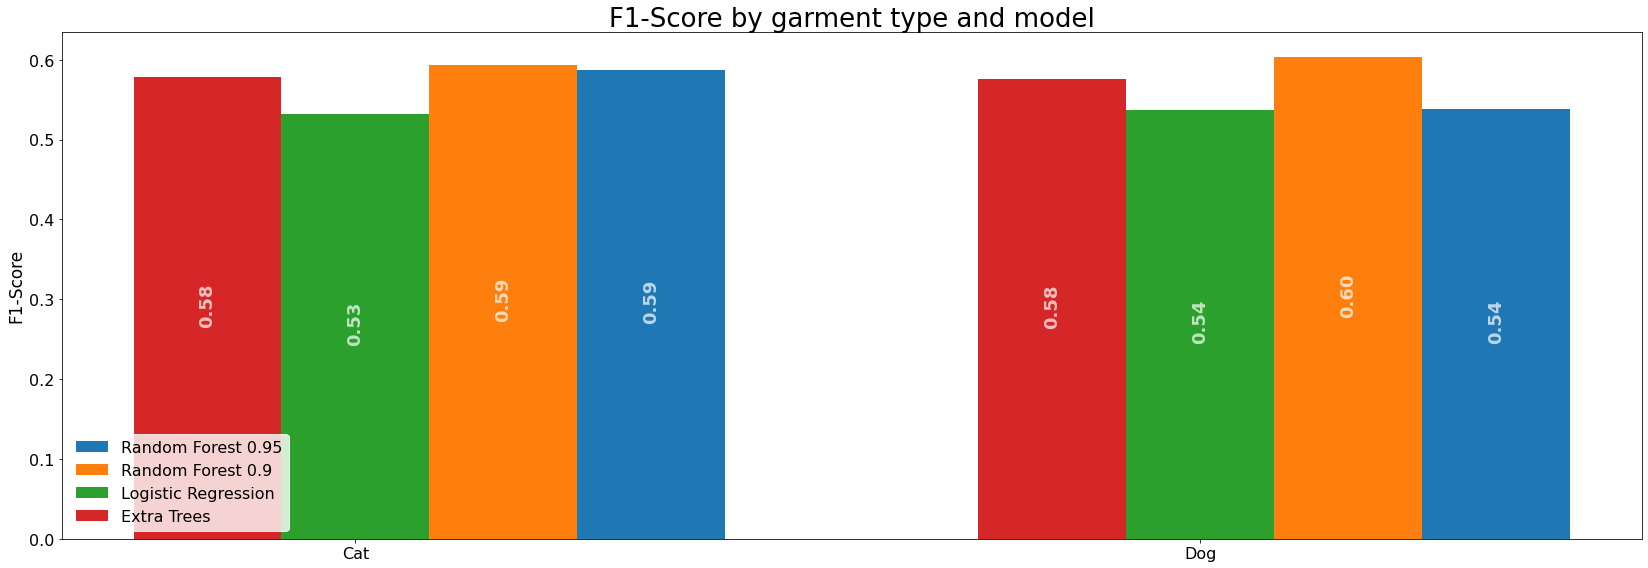

In [22]:
dictionary = {
    0 :'Cat',
    1 : 'Dog'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())
rows, cols = (4, 2)
arr = [[0 for i in range(cols)] for j in range(rows)]
j=0
for i in pred:
    fscore = f1_score(y_test, i ,average=None)
    arr[j]=fscore
    j+=1
    
fig, ax = plt.subplots(figsize = (23,8))
width = 0.35;width2=width/2
rect=[];i=0
x=np.arange(len(class_names))
for i in range(4):
    rect.append(ax.bar(x+width,arr[i],width2, label='class_names'))
    width-=width2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score',fontsize=17)
ax.set_title('F1-Score by garment type and model',fontsize=26)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(class_names)
legend=ax.legend(labels=['Random Forest 0.95','Random Forest 0.9','Logistic Regression','Extra Trees'],frameon = 2,loc='lower left',
         fontsize =16)
frame = legend.get_frame()
frame.set_color('white')
def axeplot(rect):
    ax.bar_label(rect, padding=3,fmt='%1.2f',label_type ='center',color='white',
                 fontweight='bold',fontsize=18,rotation=90,alpha=0.7)
for i in range(4):
    axeplot(rect[i])


fig.tight_layout()

In [20]:
rfpred

array(['dog', 'dog', 'dog', ..., 'dog', 'cat', 'dog'], dtype=object)

In [143]:
from cv2 import PCACompute

In [55]:
C = [0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
n_components = [0.7,0.75,0.8]
parameters = dict(pca__n_components=n_components,
                      lr__C=C,
                      lr__penalty=penalty)

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe7 = Pipeline([('pca', PCA()),('scaler', StandardScaler()),('lr',LogisticRegression())])
clf_GS = GridSearchCV(pipe7, parameters)
clf_GS.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on 